# Deep learning from scratch: homework 1, Kaiyuan Hou 2974802

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 2. </span>  Use gradient descent to minimize a simple function, and tune your steplength by analyzing the cost function plot

Copy the gradient descent code given in [Section 6.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/6_First_order_methods/6_4_Gradient_descent.html) into the cell below.

In [2]:
#### GRADIENT DESCENT CODE GOES HERE ####
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

Next run gradient descent to minimize the following function

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation}

with an initial point $w_0 = 2$ and $1000$ iterations.  Run gradient descent 3 times with 3 different choices: $\alpha = 1$, $\alpha = 10^{-1}$, $\alpha = 10^{-2}$.

Plot the resulting `cost_history` of each run in a single plot to compare their performance.  Which steplength value works best for this particular function and initial point?

1

In [3]:
# create the input function
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   

In [4]:
# RUN GRADIENT DESCENT TO MINIMIZE THIS FUNCTION
h1, c1 = gradient_descent(g, 1, 1000, 2.0)
h2, c2 = gradient_descent(g, 0.1, 1000, 2.0)
h3, c3 = gradient_descent(g, 0.01, 1000, 2.0)

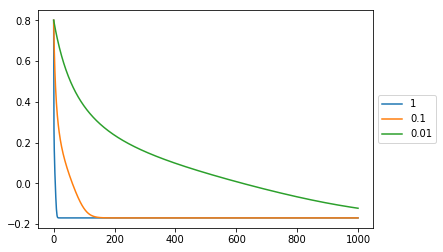

In [5]:
# COST FUNCTION HISTORY PLOTTER GOES HERE
import matplotlib.pyplot as plt
x = range(len(c1))
plt.plot(x, c1)
plt.plot(x, c2)
plt.plot(x, c3)
plt.legend(['1','0.1', '0.01'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()